<a href="https://colab.research.google.com/github/Stachiss/LogicaFuzzy-AnalisaFinanceiraCredito/blob/main/LgF_Carlos_Stachissini_Matheus_Debtil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx==2.3
!pip install imgaug==0.2.5
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 33.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=5ddcacc635924b23306c757be6e2e8ca96873e8f64e95b19232f7c28862d2327
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 562 kB 33.6 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=3b12daf5de8fc825ef6785dfc075965c445abb7156382c3134ada625e3d8e3f7
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004

159.62962962962902


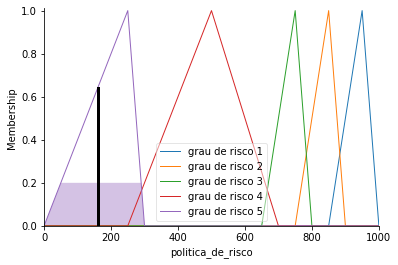

In [ ]:
from skfuzzy import control as ctrl 
import matplotlib as plt 
import skfuzzy as fuzz 
import pandas as pd 
import numpy as np

# Variáveis ​​Linguisticas. Termos Linguisticos 
score_mercado = ctrl.Antecedent (np.arange (0, 1001, 1), 'score_mercado') 
score_interno = ctrl.Antecedent (np.arange (0, 1001, 1), 'score_interno') 
engajamento = ctrl.Antecedent (np. arange (0, 5000, 1), 'engajamento') 
politica_cliente = ctrl.Consequent (np.arange (0, 1001, 1), 'politica_de_risco')

# Fuzzificação 
score_mercado ['RATING 1'] = fuzz.trimf (score_mercado.universe, [890, 900, 1000]) 
score_mercado ['RATING 2'] = fuzz.trimf (score_mercado.universe, [750, 800, 890])
score_mercado ['RATING 3'] = fuzz.trimf (score_mercado.universe, [570, 700, 750]) 
score_mercado ['RATING 4'] = fuzz.trimf (score_mercado.universe, [390, 500, 570]) 
score_mercado [ 'RATING 5'] = fuzz.trimf (score_mercado.universe, [240, 300, 390]) 
score_mercado ['RATING 6'] = fuzz.trimf (score_mercado.universe, [0, 200, 240])
score_interno ['RATING 1'] = fuzz.trimf (score_interno.universe, [890, 900, 1000]) 
score_interno ['RATING 2'] = fuzz.trimf (score_interno.universe, [750, 800, 890]) 
score_interno [ 'RATING 3'] = fuzz.trimf (score_interno.universe, [570, 700, 750])
score_interno ['RATING 4'] = fuzz.trimf (score_interno.universe, [390, 500, 570]) 
score_interno ['RATING 5'] = fuzz.trimf (score_interno.universe, [240, 300, 390]) 
score_interno [ 'RATING 6'] = fuzz.trimf (score_interno.universe, [0, 200, 240])
engajamento ['alto'] = fuzz.trimf (engajamento.universe, [300, 1000, 5000]) 
engajamento ['medio'] = fuzz.trimf (engajamento.universe, [100, 200, 300]) 
engajamento ['baixo'] = fuzz.trimf (engajamento.universe, [0, 50, 100])

politica_cliente ['grau de risco 1'] = fuzz.trimf (politica_cliente.universe, [850, 950, 1000]) 
politica_cliente ['grau de risco 2'] = fuzz.trimf (politica_cliente.universe, [750, 850, 900]) 
politica_cliente ['grau de risco 3'] = fuzz.trimf (politica_cliente.universe, [650, 750, 800]) 
politica_cliente ['grau de risco 4'] = fuzz.trimf (politica_cliente.universe, [250, 500, 700]) 
politica_cliente ['grau de risco 5'] = fuzz.trimf (politica_cliente.universe, [0, 250, 300])

# Maquina de Inferência 
regra1 = ctrl.Rule (engajamento ['baixo'] & (score_mercado ['RATING 6'] | score_interno ['RATING 6']) | (score_mercado ['RATING 5'] | score_interno ['RATING 5' ]) | (score_mercado ['RATING 4'] | score_interno ['RATING 4']) | (score_mercado ['RATING 3'] | score_interno ['RATING 3']), politica_cliente ['grau de risco 5'])
regra2 = ctrl.Rule (engajamento ['baixo'] & (score_mercado ['RATING 1'] | score_interno ['RATING 1']) | (score_mercado ['RATING 2'] | score_interno ['RATING 2']), politica_cliente ['grau de risco 4'])
regra3 = ctrl.Rule (engajamento ['medio'] & (score_mercado ['RATING 6'] | score_interno ['RATING 6']) | (score_mercado ['RATING 5'] | score_interno ['RATING 5']) | ( score_mercado ['RATING 4'] | score_interno ['RATING 4']), politica_cliente ['grau de risco 5'])
regra4 = ctrl.Rule (engajamento ['medio'] & (score_mercado ['RATING 1'] | score_interno ['RATING 1']) | (score_mercado ['RATING 2'] | score_interno ['RATING 2']) | ( score_mercado ['RATING 3'] | score_interno ['RATING 3']), politica_cliente ['grau de risco 4'])
regra5 = ctrl.Rule (engajamento ['alto'] & (score_mercado ['RATING 6'] | score_interno ['RATING 6']), politica_cliente ['grau de risco 4'])
regra6 = ctrl.Rule (engajamento ['alto'] & (score_mercado ['RATING 5'] | score_interno ['RATING 5']) | (score_mercado ['RATING 4'] | score_interno ['RATING 4']), politica_cliente ['grau de risco 3'])
regra7 = ctrl.Rule (engajamento ['alto'] & (score_mercado ['RATING 3'] | score_interno ['RATING 3']), politica_cliente ['grau de risco 2'])
regra8 = ctrl.Rule (engajamento ['alto'] & (score_mercado ['RATING 1'] | score_interno ['RATING 1']) | (score_mercado ['RATING 2'] | score_interno ['RATING 2']), politica_cliente ['grau de risco 1'])
politica_ctrl = ctrl.ControlSystem ([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8]) 
politica_simulador = ctrl.ControlSystemSimulation (politica_ctrl)

### Simulação
politica_simulador.input ['score_mercado'] = 5 
politica_simulador.input ['score_interno'] = 100 
politica_simulador.input ['engajamento'] = 90
# Deffuzificação 
politica_simulador.compute () 
print (politica_simulador.output ['politica_de_risco']) 
politica_cliente.view (sim = politica_simulador)
